In [1]:
#Written by Kobi Sherman

#import statements
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler # tried minmaxscaler, and also standardscaler, this was best

#load dataset
df = pd.read_csv('C:/Users/kobis/Desktop/FinalTennisCSV.csv')

In [2]:
# get a random subset from the dataset in order to improve computation time
# Note: my laptop crashes after a day of computing when I try to use the entire dataset
# Use train_test_split to get a random subset
fraction = 0.30
df_subset, _ = train_test_split(df, test_size=1 - fraction, random_state=69)

In [3]:
#split dataset into testing and training data
y = df_subset['winner'] #target
X = df_subset.drop('winner', axis=1) #features

scaler = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [4]:
#create the model
model = KNeighborsClassifier(n_neighbors=15, weights = 'distance', p=1.5, n_jobs=-1)

model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=15, p=1.5, weights='distance')

In [5]:
#Use model to predict
predictions = model.predict(X_test)

In [6]:
#evaluate model

#accuracy
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6074645120640451


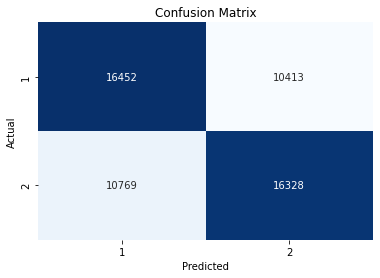

In [9]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)

#display
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# f1 score
from sklearn.metrics import f1_score

f_score = f1_score(y_test, predictions, average='weighted')  # Adjust 'weighted' if needed
print("F1 Score:", f_score)

F1 Score: 0.6074585612438625


In [11]:
# classification report
from sklearn.metrics import classification_report
print("Classification report:\n", classification_report(y_test, predictions))

Classification report:
               precision    recall  f1-score   support

           1       0.60      0.61      0.61     26865
           2       0.61      0.60      0.61     27097

    accuracy                           0.61     53962
   macro avg       0.61      0.61      0.61     53962
weighted avg       0.61      0.61      0.61     53962

